## SIR Simulation on a Small World Network 

Karnav Raval // Summer 2020

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import random
import EoN

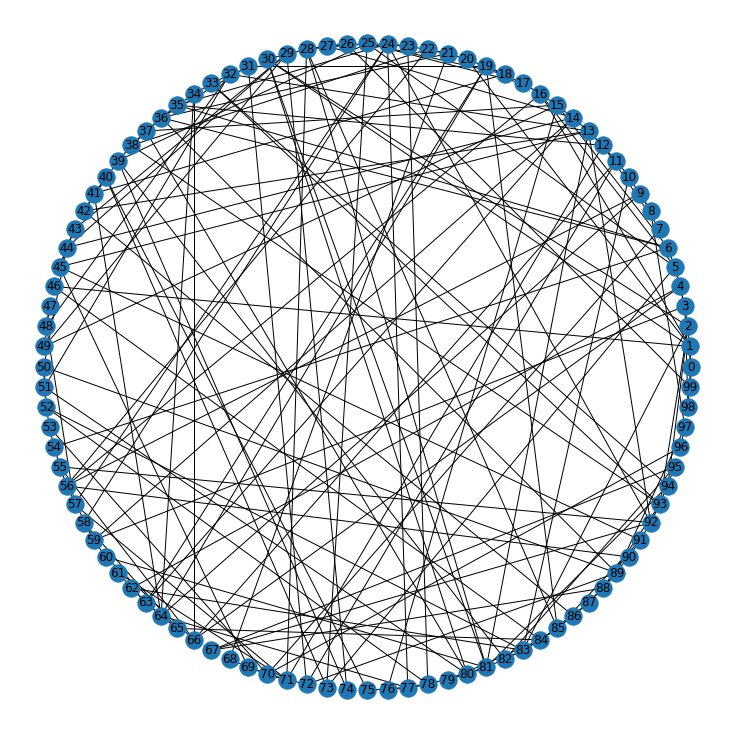

In [4]:
g=nx.watts_strogatz_graph(n=100, k=4, p=0.6)

plt.figure(figsize=(10,10))
nx.draw_circular(g, with_labels = True)

(-1.0180459422084007,
 1.0803030911691593,
 -1.0855674058220033,
 1.1160026657063509)

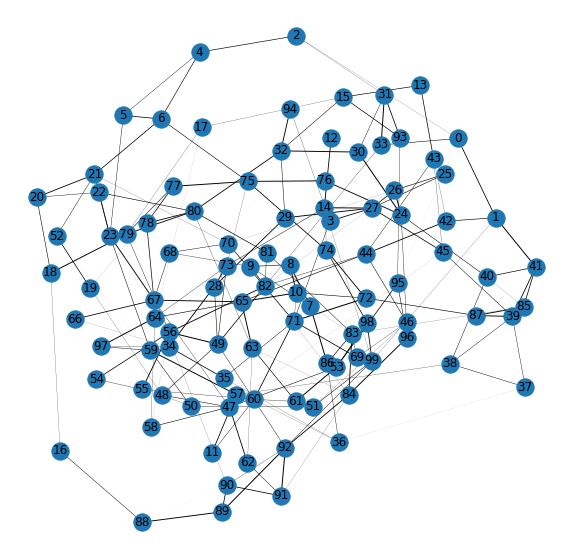

In [3]:
E = g.number_of_edges()

#initializing random weights
w = [random.random() for i in range(E)]
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)

k = 0

for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k+=1

edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]

# layout
#pos = nx.spring_layout(G, iterations=50)
pos = nx.spring_layout(g)
labels = {}
for i in range(100):
    labels[i] = i
    

# rendering
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

5.999999999999999
doing Gillespie simulation
done with simulation, now plotting


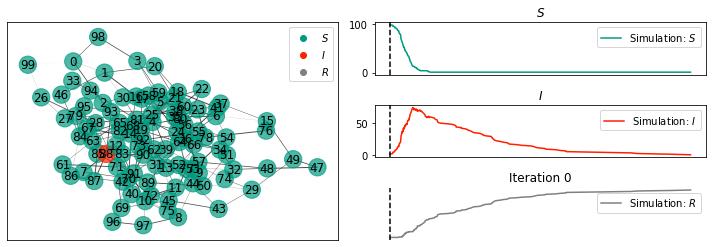

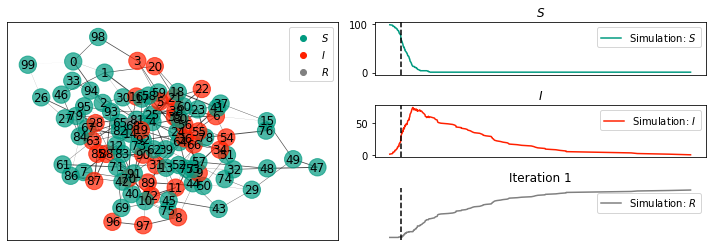

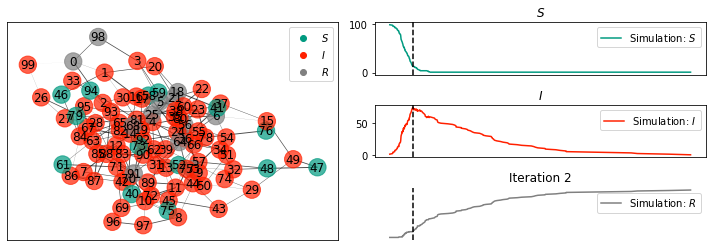

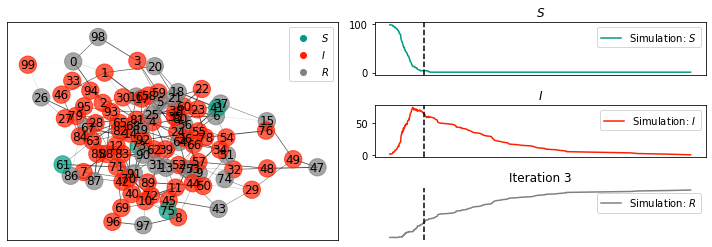

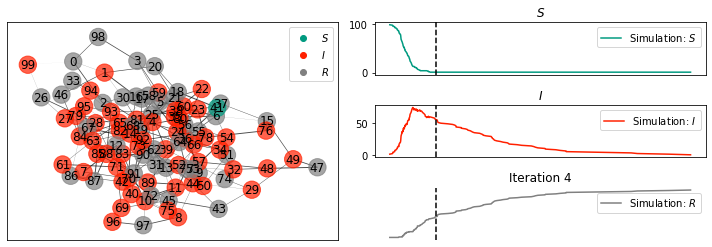

In [8]:
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial number of infected individuals 
R0 = 0
S0 = N - I0 -R0

pos = nx.spring_layout(g)

#optional arguments to be passed on to the networkx plotting command.
nx_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} 

print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, return_full_data=True)

print("done with simulation, now plotting")

for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Iteration {}".format(i))
    plt.draw()